In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [58]:
# 데이터 프레임 만들기

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [76]:
fishcolumn = fish.columns
fishcolumn
len(fishcolumn)

6

In [78]:
#Species 열을 제외한 나머지 5개는 입력데이터로 활용
fish_input = fish.iloc[:,1:len(fishcolumn)].to_numpy()
fish_target = fish.iloc[:, 0].to_numpy()

In [80]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state= 42)

In [83]:
#스케일링
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [88]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log', max_iter = 10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.773109243697479 0.775


C:\Users\82104\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [98]:
# 훈련한 모델 sc를 추가로 더 훈련하기
#모델 이어서 훈련시 parial_fit() 이용
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

ValueError: classes must be passed on the first call to partial_fit.

Text(0, 0.5, 'accuracy')

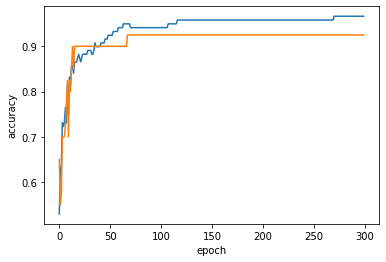

In [104]:
# 과소, 과대적합 그래프 그려보기

import numpy as np
sc = SGDClassifier(loss='log' , random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled , train_target , classes = classes )
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

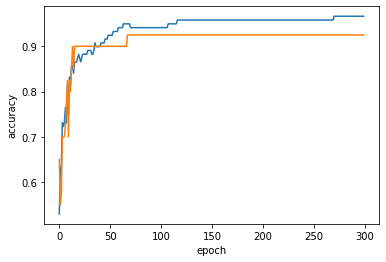

In [108]:
import numpy as np 
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)
for i in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [110]:
# SGDClassifier 의 반복횟수를 100에 맞추고 모델 훈련
sc = SGDClassifier(loss='log', max_iter = 100 , tol=None, random_state= 42)
sc.fit(train_scaled, train_target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [112]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [114]:
sc = SGDClassifier(loss='hinge', max_iter= 100 , tol = None , random_state =42)
sc.fit(train_scaled , train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled,test_target))

0.9495798319327731 0.925
